In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [58]:
df = pd.read_csv('house_data.csv')
df.head()

,date,age,distance,stores,latitude,longitude,price
0,2009,21,9,6,84,121,14264
1,2007,4,2,3,86,121,12032
2,2016,18,3,7,90,120,13560
3,2002,13,2,2,80,128,12029
4,2014,25,5,8,81,122,14157


In [59]:
prices = df['price']

In [60]:
df.tail()

,date,age,distance,stores,latitude,longitude,price
4995,2007,17,6,3,90,125,13539
4996,2016,7,10,0,85,129,14757
4997,2017,6,10,5,90,125,14102
4998,2010,37,3,5,81,128,14313
4999,2018,9,1,9,90,127,12770


In [61]:
df.shape

(5000, 7)

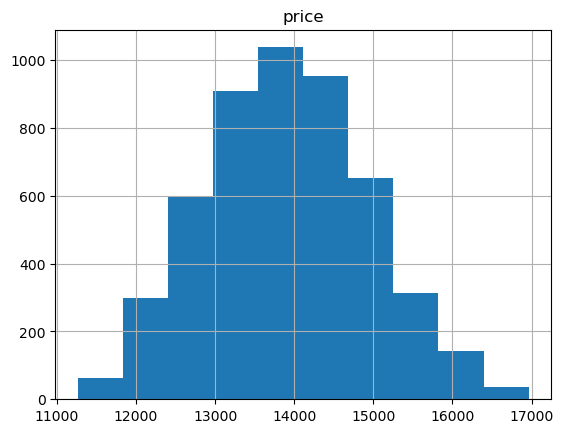

In [62]:
df.hist("price")
plt.show()

In [63]:
df.isna()

,date,age,distance,stores,latitude,longitude,price
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False


In [64]:
df.isna().sum()

date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

In [65]:
df = df.iloc[:,1:]
df_norm = (df - df.mean())/df.std()
df_norm.head()

,age,distance,stores,latitude,longitude,price
0,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


In [66]:
X = df_norm.iloc[:,:5]
X.head()

,age,distance,stores,latitude,longitude
0,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.534444,0.006938,0.981581,-1.255981,-0.945141


In [67]:
Y = df_norm.iloc[:,-1]
Y.head()

0    0.350088
1   -1.836486
2   -0.339584
3   -1.839425
4    0.245266
Name: price, dtype: float64

In [68]:
X_arr = X.values
Y_arr = Y.values

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X_arr, Y_arr, test_size = 0.01, shuffle = True, random_state = 1)

print('X_train shape: ',X_train.shape)
print('Y_train shape: ',Y_train.shape)
print('X_test shape: ',X_test.shape)
print('Y_test shape: ',Y_test.shape)

X_train shape:  (4950, 5)
Y_train shape:  (4950,)
X_test shape:  (50, 5)
Y_test shape:  (50,)


In [70]:
def get_model():
    model = Sequential([
        Dense(10, input_shape = (5,), activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(5, activation = 'relu'),
        Dense(1)
    ])
    model.compile(
        loss = 'mse',
        optimizer = 'adadelta'
    )
    
    return model

In [71]:
model = get_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                60        
                                                                 
 dense_9 (Dense)             (None, 20)                220       
                                                                 
 dense_10 (Dense)            (None, 5)                 105       
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 391
Trainable params: 391
Non-trainable params: 0
_________________________________________________________________


In [72]:
model = get_model()

#Prediction before training the model
pred_on_untrained = model.predict(X_test)

2/2 [==============================] - 0s 1ms/step


In [73]:
#Train model and store in Object history
history = model.fit(
X_train, Y_train,
validation_data = (X_test, Y_test),
epochs=300)

Epoch 1/300
155/155 [==============================] - 1s 1ms/step - loss: 1.0902 - val_loss: 0.6949
Epoch 2/300
155/155 [==============================] - 0s 905us/step - loss: 1.0881 - val_loss: 0.6932
Epoch 3/300
155/155 [==============================] - 0s 870us/step - loss: 1.0859 - val_loss: 0.6916
Epoch 4/300
155/155 [==============================] - 0s 919us/step - loss: 1.0839 - val_loss: 0.6900
Epoch 5/300
155/155 [==============================] - 0s 871us/step - loss: 1.0818 - val_loss: 0.6884
Epoch 6/300
155/155 [==============================] - 0s 896us/step - loss: 1.0797 - val_loss: 0.6868
Epoch 7/300
155/155 [==============================] - 0s 925us/step - loss: 1.0777 - val_loss: 0.6852
Epoch 8/300
155/155 [==============================] - 0s 886us/step - loss: 1.0756 - val_loss: 0.6836
Epoch 9/300
155/155 [==============================] - 0s 926us/step - loss: 1.0736 - val_loss: 0.6820
Epoch 10/300
155/155 [==============================] - 0s 888us/step - los

Epoch 80/300
155/155 [==============================] - 0s 864us/step - loss: 0.9535 - val_loss: 0.5944
Epoch 81/300
155/155 [==============================] - 0s 874us/step - loss: 0.9521 - val_loss: 0.5935
Epoch 82/300
155/155 [==============================] - 0s 1ms/step - loss: 0.9507 - val_loss: 0.5926
Epoch 83/300
155/155 [==============================] - 0s 992us/step - loss: 0.9493 - val_loss: 0.5917
Epoch 84/300
155/155 [==============================] - 0s 935us/step - loss: 0.9479 - val_loss: 0.5908
Epoch 85/300
155/155 [==============================] - 0s 943us/step - loss: 0.9465 - val_loss: 0.5899
Epoch 86/300
155/155 [==============================] - 0s 1ms/step - loss: 0.9451 - val_loss: 0.5890
Epoch 87/300
155/155 [==============================] - 0s 999us/step - loss: 0.9437 - val_loss: 0.5882
Epoch 88/300
155/155 [==============================] - 0s 1ms/step - loss: 0.9424 - val_loss: 0.5873
Epoch 89/300
155/155 [==============================] - 0s 938us/step 

155/155 [==============================] - 0s 1ms/step - loss: 0.7340 - val_loss: 0.4532
Epoch 238/300
155/155 [==============================] - 0s 997us/step - loss: 0.7326 - val_loss: 0.4523
Epoch 239/300
155/155 [==============================] - 0s 1ms/step - loss: 0.7312 - val_loss: 0.4515
Epoch 240/300
155/155 [==============================] - 0s 915us/step - loss: 0.7298 - val_loss: 0.4506
Epoch 241/300
155/155 [==============================] - 0s 917us/step - loss: 0.7284 - val_loss: 0.4497
Epoch 242/300
155/155 [==============================] - 0s 921us/step - loss: 0.7270 - val_loss: 0.4489
Epoch 243/300
155/155 [==============================] - 0s 910us/step - loss: 0.7256 - val_loss: 0.4479
Epoch 244/300
155/155 [==============================] - 0s 884us/step - loss: 0.7243 - val_loss: 0.4470
Epoch 245/300
155/155 [==============================] - 0s 887us/step - loss: 0.7229 - val_loss: 0.4461
Epoch 246/300
155/155 [==============================] - 0s 969us/step - 

In [74]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

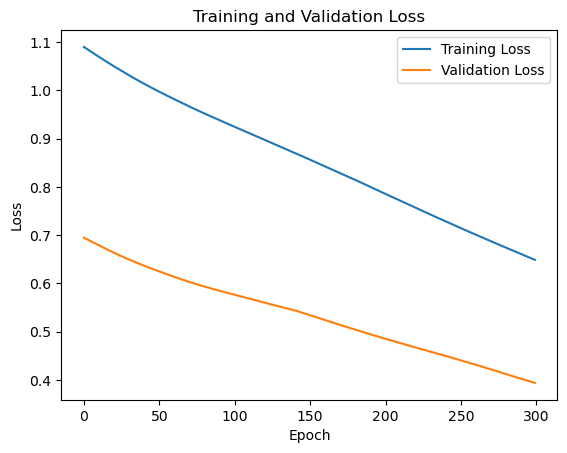

In [75]:
#plot history
plot_loss(history)

In [76]:
#Predictions on trained model
pred_on_trained = model.predict(X_test)

2/2 [==============================] - 0s 997us/step


In [77]:
def compare_predictions(pred_on_untrained, pred_on_trained, Y_test):
    plt.figure(figsize=(8, 6))

    # Plot predictions from the untrained model
    plt.scatter(Y_test, pred_on_untrained, color='blue', label='Untrained Model')

    # Plot predictions from the trained model
    plt.scatter(Y_test, pred_on_trained, color='green', label='Trained Model', alpha=0.5)

    # Plot the ideal prediction line
    plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='red', label='Ideal Prediction')

    plt.title('Comparison of Predictions')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.legend()

    plt.show()

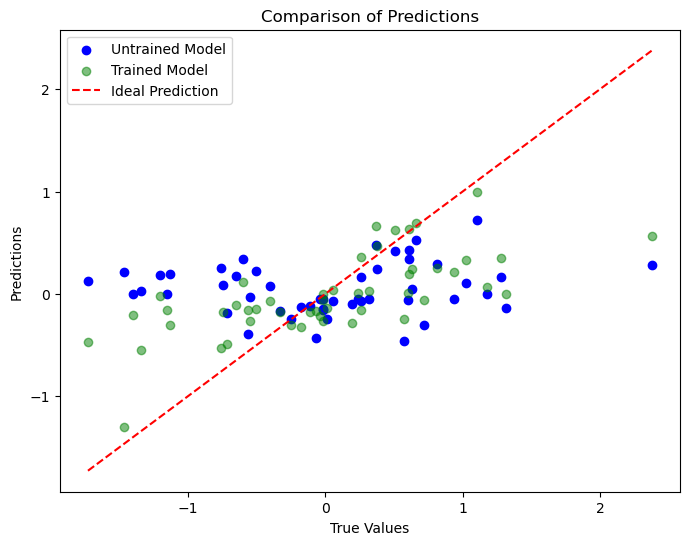

In [78]:
compare_predictions(pred_on_untrained, pred_on_trained, Y_test)

In [79]:
y_mean = df['price'].mean()
y_std = df['price'].std()

def convert_label_actual(predictions):
    return int(predictions * y_std + y_mean)

print(convert_label_actual(0.350088))

14263
